In [1]:
from myfunk import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

/Users/iZbra1/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
# LOAD SAMPLE DATA
mkt = pd.read_csv('marketdata_sample.csv')
nws = pd.read_csv('news_sample.csv')
print(mkt.shape, nws.shape)

## REMOVE DUPES

mkt = mkt.drop_duplicates()
nws = nws.drop_duplicates()
print(mkt.shape, nws.shape)



(100, 16) (100, 35)
(100, 16) (100, 35)


In [3]:
## NORMALIZE 

# gdpbins = np.logspace(*np.log10(gdpr), 25)
# plt.plot(gdpbins)

norm_mkt_labels = ["volume","open","close",'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
              'returnsClosePrevRaw10', 'returnsOpenPrevRaw10']
mkt = log_transform(mkt,norm_mkt_labels)

norm_nws_labels = ["bodySize","sentenceCount","wordCount","firstMentionSentence","sentimentWordCount",
         'noveltyCount12H','noveltyCount24H','noveltyCount3D','noveltyCount5D','noveltyCount7D',
         'volumeCounts12H','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D']
nws = log_transform(nws,norm_nws_labels)

In [4]:
## TRIM 

drop_mkt_feats = ['assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10']

In [5]:
mkt.drop(drop_mkt_feats, axis=1, inplace=True)
mkt.set_index('assetCode',inplace=True)
print(mkt.shape)

(100, 10)


In [6]:
drop_nws_feats = ['sourceTimestamp', 'firstCreated', 'headline','sourceId',
'provider', 'subjects', 'audiences','headlineTag', 'assetName', 
'bodySize','sentenceCount', 'wordCount','firstMentionSentence', 'sentimentWordCount',
'noveltyCount12H', 'noveltyCount24H',
'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D']

In [7]:
nws.drop(drop_nws_feats, axis=1, inplace=True)
print(nws.shape)

(100, 26)


# EDA

In [445]:
plot_mkt_feats = ['universe', 'volumeLog', ['openLog', 'closeLog'],
       ['returnsClosePrevRaw1Log', 'returnsOpenPrevRaw1Log',
       'returnsClosePrevRaw10Log', 'returnsOpenPrevRaw10Log'],
       'returnsOpenNextMktres10']

plot_nws_feats = ['assetCodes', 'urgency', 'takeSequence', 'marketCommentary', 
        'companyCount','relevance', 
        ['sentenceCountLog','firstMentionSentenceLog'], ['wordCountLog','bodySizeLog','sentimentWordCountLog'],
        'sentimentClass',
        ['sentimentNegative', 'sentimentNeutral', 'sentimentPositive'],
        ['noveltyCount12HLog', 'noveltyCount24HLog', 'noveltyCount3DLog',
        'noveltyCount5DLog', 'noveltyCount7DLog'], ['volumeCounts12HLog',
        'volumeCounts24HLog', 'volumeCounts3DLog', 'volumeCounts5DLog',
        'volumeCounts7DLog']]

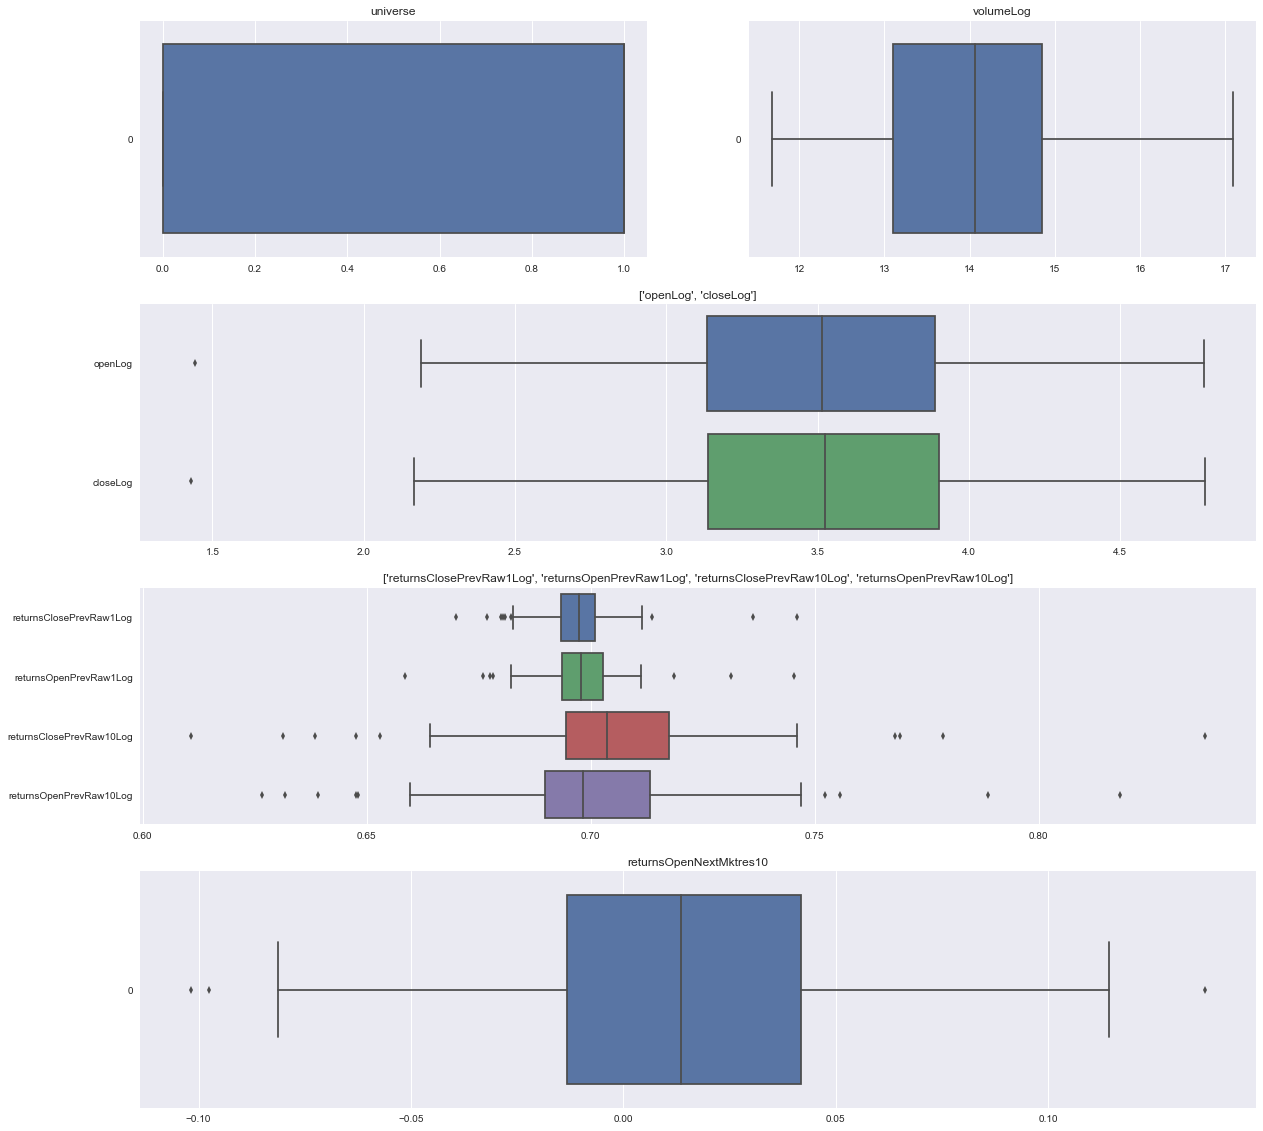

In [142]:
print_preprocessing_x(mkt, plot_mkt_feats, [2,1,1,1])

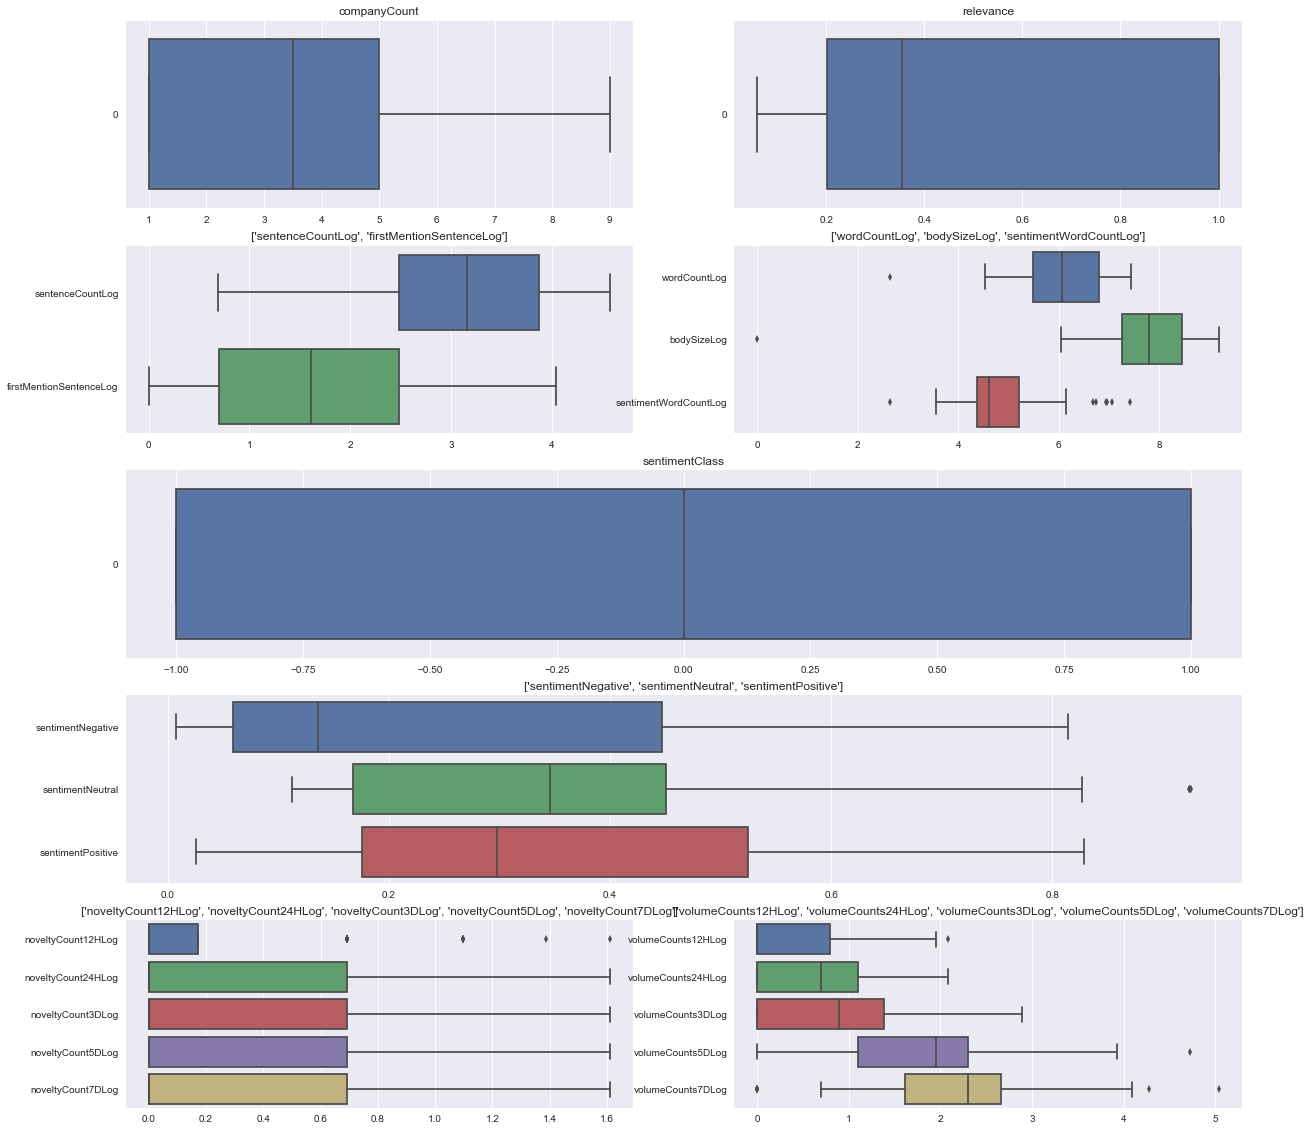

In [141]:
print_preprocessing_x(nws, plot_nws_feats[5:],[2,2,1,1,2])

In [446]:
# Double loop conditional comprehension list:  Not very optimal since it repeats the non list items. 
mkt_prediction_col = ['time']+list(set([sublist if isinstance(sublist,str) else item for sublist in mkt_feats for item in sublist]))
mkt_prediction_col.sort()
# Double loop conditional comprehension list:  Not very optimal since it repeats the non list items. 
nws_prediction_col = ['time','assetCodes']+list(set([sublist if isinstance(sublist,str) else item for sublist in nws_feats for item in sublist]))
nws_prediction_col.sort()


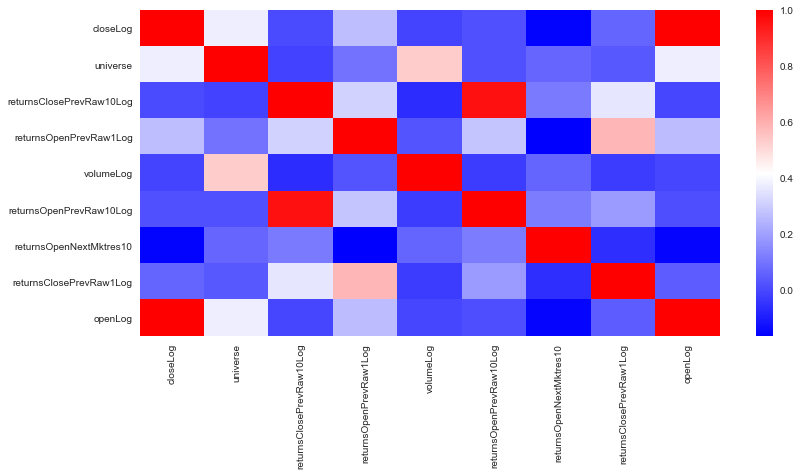

In [15]:
# Correlation of market data
fig = plt.figure(figsize=(13,6))
mycorr = mkt.loc[:,mkt_prediction_col[1:]].corr()
sns.heatmap(mycorr, cmap="bwr")

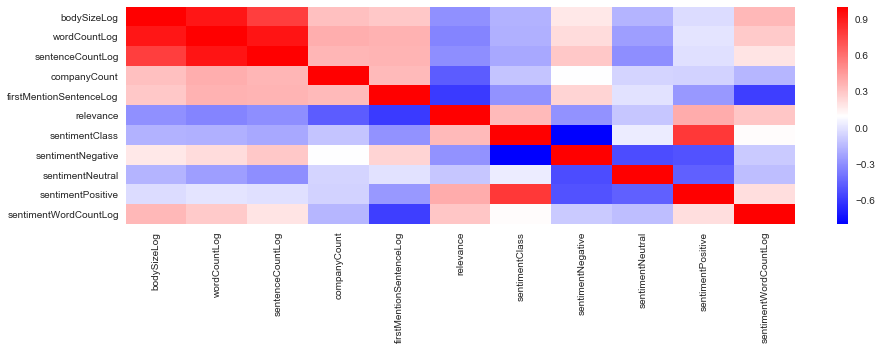

In [16]:
# Correlation of news data
fig = plt.figure(figsize=(15,4))
nws_col_corr = ['bodySizeLog', 'wordCountLog', 'sentenceCountLog','companyCount', 'firstMentionSentenceLog',
        'relevance','sentimentClass','sentimentNegative', 'sentimentNeutral', 'sentimentPositive','sentimentWordCountLog']
mycorr = nws.loc[:,nws_col_corr].corr()
sns.heatmap(mycorr, cmap="bwr")
plt.show()

# FEATURE ENGINEERING

In [ ]:
## CREATE A DATAFRAME HOLDING EACH SUBJECT AND IT's TOTAL OCCURRENCE FOR EVERY NEWS
def  = get
subjects = {}
n_sub = []   # List with Number of subjects per row. 
for subject_nws in nws.subjects:
    n = 0
    for s in subject_nws.replace('{','').replace('}','').replace("'",'').replace(" ",'').split(','):
        n += 1
        if s in subjects.keys():
            subjects[s]+=1
        else:
            subjects[s] = 1
    n_sub.append(n) 

    
## CREATE A DATAFRAME HOLDING EACH AUDIENCE AND IT's TOTAL OCCURRENCE FOR EVERY NEWS
audience = {}
n_audi = []
for audi in nws.audiences:
    n = 0
    for a in audi.replace('{','').replace('}','').replace("'",'').replace(" ",'').split(','):
        n += 1 
        if a in audience.keys():
            audience[a] += 1
        else:
            audience[a] = 1
    n_audi.append(n)        

# MODEL SELECTION

count                           100
unique                            1
top       2007-02-01 22:00:00+00:00
freq                            100
Name: time, dtype: object

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

---

# Script

In [1]:
from myfunk import *
from dateutil import parser
from time import time
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

# LOAD SAMPLE DATA
mkt = pd.read_csv('marketdata_sample.csv')
nws = pd.read_csv('news_sample.csv')


## REMOVE DUPES

mkt = mkt.drop_duplicates()
nws = nws.drop_duplicates()


## SAMPLE




## CAST INTO CORRECT DATA TYPES

mkt.time = mkt.time.apply(lambda x: parser.parse(x))
nws.time = nws.time.apply(lambda x: parser.parse(x))
nws.sourceTimestamp = nws.sourceTimestamp.apply(lambda x: parser.parse(x))
nws.firstCreated = nws.firstCreated.apply(lambda x: parser.parse(x))

## NORMALIZE 

# gdpbins = np.logspace(*np.log10(gdpr), 25)
# plt.plot(gdpbins)

norm_mkt_labels = ["volume","open","close",'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
              'returnsClosePrevRaw10', 'returnsOpenPrevRaw10']
mkt = log_transform(mkt,norm_mkt_labels)

norm_nws_labels = ["bodySize","sentenceCount","wordCount","firstMentionSentence","sentimentWordCount",
         'noveltyCount12H','noveltyCount24H','noveltyCount3D','noveltyCount5D','noveltyCount7D',
         'volumeCounts12H','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D']
nws = log_transform(nws,norm_nws_labels)

## TRIM 

drop_mkt_feats = ['assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10']

mkt.drop(drop_mkt_feats, axis=1, inplace=True)
#mkt.set_index('assetCode',inplace=True)


drop_nws_feats = ['headline','sourceId','sourceTimestamp', 'firstCreated',
'provider', 'subjects', 'audiences','headlineTag', 'assetName', 
'bodySize','sentenceCount', 'wordCount','firstMentionSentence', 'sentimentWordCount',
'noveltyCount12H', 'noveltyCount24H',
'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D']

nws.drop(drop_nws_feats, axis=1, inplace=True)


/Users/iZbra1/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:

## DIMENSIONALITY REDUCTION    (for practicity sake)
nws_prediction_col = ['assetCodes','time',
                      'sentimentWordCountLog','sentimentNegative','sentimentNeutral', 'sentimentPositive']
mkt_prediction_col = ['assetCode','time',
                      'volumeLog','closeLog']
mkt = mkt.loc[:,mkt_prediction_col]
nws = nws.loc[:,nws_prediction_col]


In [3]:
## CONSOLIDATE TIME VARIABLES

# i.e: 2007-01-01 22:00:01+00:00 -> 2007-01-02 
#      2007-01-01 21:59:59+00:00 -> 2007-01-01

nws['time'] = (nws['time'] - np.timedelta64(22,'h')).dt.ceil('1D')  #.dt.date
mkt['time'] = mkt['time'].dt.floor('1D')



## EXPLODE ASSETCODES

***TAKES 538 SEC***

In [4]:
nws['assetCodes'] = nws.assetCodes.apply(lambda a: a.replace('{','').replace('}','').replace("'",'').replace(" ",''))

start = time()
nws = pd.concat([pd.DataFrame({'time':row['time'],
                               'sentimentWordCountLog':row['sentimentWordCountLog'],
                                'sentimentNegative':row['sentimentNegative'],
                                'sentimentNeutral':row['sentimentNeutral'],
                                'sentimentPositive':row['sentimentPositive']},
                              index=row['assetCodes'].split(','))              
                    for _, row in nws.loc[:,nws_prediction_col].iterrows()]).reset_index()
nws.rename(columns={'index':'assetCode'}, inplace=True)
print(time()-start)

0.3337538242340088


In [6]:
nws.dtypes

assetCode                 object
sentimentNegative        float64
sentimentNeutral         float64
sentimentPositive        float64
sentimentWordCountLog    float64
time                      object
dtype: object

In [9]:
#  MERGE WITH MARKET DATA


# Drop those rows where the assetCodes dont have any market data nor news info

# Build train and test sets. 

,assetCode,closeLog,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCountLog,time,volumeLog
0,A.N,3.502218,NaN,NaN,NaN,NaN,2007-02-01,14.773673
1,AAI.N,2.494774,NaN,NaN,NaN,NaN,2007-02-01,14.534131
2,AAP.N,3.650892,NaN,NaN,NaN,NaN,2007-02-01,13.968061
3,AAPL.O,4.451308,NaN,NaN,NaN,NaN,2007-02-01,16.982981
4,ABB.N,2.945438,NaN,NaN,NaN,NaN,2007-02-01,14.004974


#### Time frames

In [25]:
# Convert to datetime
from dateutil.parser import parse

mkt.time = mkt.time.apply(lambda x: parse(x))
nws.time = nws.time.apply(lambda x: parse(x))

In [31]:
pd.DataFrame({'mkt_time_min':mkt.time.min(), 'mkt_time_max':mkt.time.max(), 'mkt_diff':mkt.time.max()-mkt.time.min(), 'nws_time_min':nws.time.min(), 'nws_time_max':nws.time.max(),'nws_diff':nws.time.max()-nws.time.min()}, index=[0])

,mkt_diff,mkt_time_max,mkt_time_min,nws_diff,nws_time_max,nws_time_min
0,0 days,2007-02-01 22:00:00+00:00,2007-02-01 22:00:00+00:00,1 days 02:31:26,2007-01-02 07:00:58+00:00,2007-01-01 04:29:32+00:00


## Kaggle code

```python

import numpy as np
import pandas as pd
from time import time
from dateutil import parser
import warnings
warnings.filterwarnings('ignore')

def make_random_predictions(predictions_df):
    predictions_df.confidenceValue = 2.0 * np.random.rand(len(predictions_df)) - 1.0
    
# Takes a dataframe and the columnns as labels that will log transform them.
def log_transform(df,labels):
    for label in labels:
        new_label = label+'Log'
        a = np.min([0.001, int(np.floor(df[[label]].min().values[0]))])
        df[new_label] = df[[label]].apply(lambda x: np.log(x+1-a))
#        df.drop(label, inplace=True, axis=1)
    return df

```

```python
# First let's import the module and create an environment.
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
env = twosigmanews.make_env()
(market_train_df, news_train_df) = env.get_training_data()
# You can only iterate through a result from `get_prediction_days()` once
# so be careful not to lose it once you start iterating.
days = env.get_prediction_days()

# make_random_predictions(predictions_template_df)
# env.predict(predictions_template_df)
(market_obs_df, news_obs_df, predictions_template_df) = next(days)
```